In [1]:
! pip install nltk

In [2]:
import nltk
import pandas as pd

from tqdm import tqdm

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk import pos_tag

### dataloader

In [3]:
df = pd.read_excel('./NLP_data/parasite_review_rotten_tomatoes.xlsx')

In [4]:
df

author          organization               date  \
0        Alex Bentley            CultureMap  February 17, 2021   
1    Rhys Bowen Jones        JumpCut Online   February 2, 2021   
2          PJ Nabarro       Patrick Nabarro  December 31, 2020   
3          Jason Best          Marie Claire  December 21, 2020   
4       Wesley Lovell          Cinema Sight  December 17, 2020   
..                ...                   ...                ...   
453     Jessica Kiang               Variety       May 21, 2019   
454     Robbie Collin  Daily Telegraph (UK)       May 21, 2019   
455    Peter Bradshaw              Guardian       May 21, 2019   
456    Stephen Dalton    Hollywood Reporter       May 21, 2019   
457   Jonathan Romney  Screen International       May 21, 2019   

                                                review  
0    Parasite is a master class in storytelling, pr...  
1    I'll just come out and say it. Parasite is a m...  
2    The film feels too insincere and hypocritical ...  
3    Boon Joon Ho keeps us thoroughly enthralled as...  
4    A splendid take on class inequalities that for...  
..                                                 ...  
453  Bong is back and on brilliant form, but he is ...  
454  It's a film that burrows under your skin and s...  
455               Parasite gets its tendrils into you.  
456  Parasite is generally gripping and finely craf...  
457  A vigorous and tightly controlled comedy that ...  

[458 rows x 4 columns]

### 전처리시작

In [5]:
ex=df['review'][4]
ex

'A splendid take on class inequalities that force the audience to question who is the parasite, the rich or the poor.'

In [6]:
ex2=ex.lower()
ex3 = re.sub(r'[.\,\!\:\@\#\$\%\&\*\+\;\➤\/\(\)\[\]]','',ex2)
ex3

'a splendid take on class inequalities that force the audience to question who is the parasite the rich or the poor'

In [7]:
ex4=WordPunctTokenizer().tokenize(ex3)
print(ex4)

['a', 'splendid', 'take', 'on', 'class', 'inequalities', 'that', 'force', 'the', 'audience', 'to', 'question', 'who', 'is', 'the', 'parasite', 'the', 'rich', 'or', 'the', 'poor']


In [8]:
tokens_pos= pos_tag(ex4)
print(tokens_pos)

[('a', 'DT'), ('splendid', 'JJ'), ('take', 'NN'), ('on', 'IN'), ('class', 'NN'), ('inequalities', 'NNS'), ('that', 'WDT'), ('force', 'VBP'), ('the', 'DT'), ('audience', 'NN'), ('to', 'TO'), ('question', 'NN'), ('who', 'WP'), ('is', 'VBZ'), ('the', 'DT'), ('parasite', 'NN'), ('the', 'DT'), ('rich', 'JJ'), ('or', 'CC'), ('the', 'DT'), ('poor', 'JJ')]


In [9]:
key_words = []
for word, pos in tokens_pos:
    if pos in ['NN','NNS','NNP','NNPS','JJ','JJR','JJS']:
        key_words.append(word)
print(key_words)

['splendid', 'take', 'class', 'inequalities', 'audience', 'question', 'parasite', 'rich', 'poor']


In [10]:
wlem =WordNetLemmatizer()

lemmatized_words = []
for word in key_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['splendid', 'take', 'class', 'inequality', 'audience', 'question', 'parasite', 'rich', 'poor']


In [11]:
stopwords_list=stopwords.words('english')
# customized_stopwords_list=[]

unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)
            
print(final_NN_words)

['splendid', 'take', 'class', 'inequality', 'audience', 'question', 'parasite', 'rich', 'poor']


In [12]:
unique_NN_words = set(lemmatized_words)

In [13]:
unique_NN_words

{'audience',
 'class',
 'inequality',
 'parasite',
 'poor',
 'question',
 'rich',
 'splendid',
 'take'}

전처리 함수 만들기

In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk import pos_tag
from tqdm import tqdm
tqdm.pandas()

def text_preprocessing(text):
    #ex2=text.lower()
    ex3 = re.sub(r'[.\,\!\:\@\#\$\%\&\*\'\"\+\;\➤\/\(\)\[\]]','',text)
    ex4=WordPunctTokenizer().tokenize(ex3)
    
    tokens_pos= pos_tag(ex4)
    
    key_words = []
    for word, pos in tokens_pos:
        if pos in ['NN','NNS','NNP','NNPS','JJ','JJR','JJS']:
            key_words.append(word)
            
    wlem =WordNetLemmatizer()

    lemmatized_words = []
    for word in key_words:
        new_word = wlem.lemmatize(word)
        lemmatized_words.append(new_word)
     
    
    stopwords_list=stopwords.words('english')

    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words

    # 불용어 제거
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words: final_NN_words.remove(word)
                
    return final_NN_words



In [15]:
def math_f(n):
    a=1+n
    
    return a

In [16]:
b=math_f(4)
b

5

In [17]:
tqdm.pandas()
df["preprocessed_reviews"]=df['review'].progress_apply(lambda x: text_preprocessing(x))

100%|███████████████████████████████████████████████████████████████████████████████| 458/458 [00:01<00:00, 425.77it/s]


In [18]:
df

author          organization               date  \
0        Alex Bentley            CultureMap  February 17, 2021   
1    Rhys Bowen Jones        JumpCut Online   February 2, 2021   
2          PJ Nabarro       Patrick Nabarro  December 31, 2020   
3          Jason Best          Marie Claire  December 21, 2020   
4       Wesley Lovell          Cinema Sight  December 17, 2020   
..                ...                   ...                ...   
453     Jessica Kiang               Variety       May 21, 2019   
454     Robbie Collin  Daily Telegraph (UK)       May 21, 2019   
455    Peter Bradshaw              Guardian       May 21, 2019   
456    Stephen Dalton    Hollywood Reporter       May 21, 2019   
457   Jonathan Romney  Screen International       May 21, 2019   

                                                review  \
0    Parasite is a master class in storytelling, pr...   
1    I'll just come out and say it. Parasite is a m...   
2    The film feels too insincere and hypocritical ...   
3    Boon Joon Ho keeps us thoroughly enthralled as...   
4    A splendid take on class inequalities that for...   
..                                                 ...   
453  Bong is back and on brilliant form, but he is ...   
454  It's a film that burrows under your skin and s...   
455               Parasite gets its tendrils into you.   
456  Parasite is generally gripping and finely craf...   
457  A vigorous and tightly controlled comedy that ...   

                                  preprocessed_reviews  
0    [Parasite, master, class, finest, example, mas...  
1                         [Ill, Parasite, masterpiece]  
2    [film, feel, hypocritical, theme, social, inju...  
3    [Boon, Joon, Ho, story, shift, tone, satire, s...  
4    [splendid, take, class, inequality, audience, ...  
..                                                 ...  
453  [Bong, brilliant, form, furious, target, enorm...  
454                          [film, skin, sink, teeth]  
455                                [Parasite, tendril]  
456  [Parasite, gripping, Bongs, mature, state, nat...  
457  [vigorous, comedy, Bong, top, form, story, Kor...  

[458 rows x 5 columns]

In [19]:
df['preprocessed_reviews'][4]

['splendid',
 'take',
 'class',
 'inequality',
 'audience',
 'question',
 'parasite',
 'rich',
 'poor']

In [20]:
a=[1,2,3,4,5,6,7]

In [21]:
len(a)

7

In [22]:
for i in range(0,7):
    print(i)

0
1
2
3
4
5
6


In [23]:
total_words_lists=[]

for words in df["preprocessed_reviews"]:
    for i in words:
        total_words_lists.append(''.join(i))
    

total_words_lists

['Parasite',
 'master',
 'class',
 'finest',
 'example',
 'mass',
 'deep',
 'meaningful',
 'story',
 'Ill',
 'Parasite',
 'masterpiece',
 'film',
 'feel',
 'hypocritical',
 'theme',
 'social',
 'injustice',
 'Boon',
 'Joon',
 'Ho',
 'story',
 'shift',
 'tone',
 'satire',
 'screwball',
 'farce',
 'black',
 'comedy',
 'horror',
 'sympathy',
 'family',
 'splendid',
 'take',
 'class',
 'inequality',
 'audience',
 'question',
 'parasite',
 'rich',
 'poor',
 'content',
 'basic',
 'premise',
 'crime',
 'punishment',
 'director',
 'Bong',
 'Joon',
 'Ho',
 'step',
 'tangent',
 'running',
 'time',
 'ironic',
 'tone',
 'event',
 'berserk',
 'Parasite',
 'entertaining',
 'foremost',
 'actor',
 'different',
 'nuance',
 'respective',
 'portrayal',
 'sync',
 'picture',
 'tone',
 'Bongs',
 'work',
 'galvanizing',
 'movie',
 'people',
 'wealth',
 'gap',
 'precariousness',
 'urban',
 'underclass',
 'era',
 'climate',
 'change',
 'best',
 'film',
 'decade',
 'Korean',
 'nation',
 'way',
 'interesting',
 

In [24]:
from collections import Counter
word_counts=Counter(total_words_lists)
word_counts

Counter({'Parasite': 170,
         'master': 11,
         'class': 57,
         'finest': 6,
         'example': 1,
         'mass': 1,
         'deep': 7,
         'meaningful': 1,
         'story': 25,
         'Ill': 1,
         'masterpiece': 25,
         'film': 127,
         'feel': 4,
         'hypocritical': 1,
         'theme': 9,
         'social': 44,
         'injustice': 4,
         'Boon': 1,
         'Joon': 80,
         'Ho': 19,
         'shift': 5,
         'tone': 12,
         'satire': 33,
         'screwball': 1,
         'farce': 6,
         'black': 6,
         'comedy': 36,
         'horror': 9,
         'sympathy': 1,
         'family': 29,
         'splendid': 3,
         'take': 4,
         'inequality': 10,
         'audience': 10,
         'question': 4,
         'parasite': 6,
         'rich': 18,
         'poor': 13,
         'content': 1,
         'basic': 1,
         'premise': 2,
         'crime': 2,
         'punishment': 1,
         'director': 23,
 

In [25]:
word_counts.most_common(50)

[('Parasite', 170),
 ('film', 127),
 ('Bong', 113),
 ('Joon', 80),
 ('class', 57),
 ('movie', 53),
 ('ho', 50),
 ('Spanish', 45),
 ('social', 44),
 ('Full', 44),
 ('best', 38),
 ('year', 37),
 ('comedy', 36),
 ('satire', 33),
 ('family', 29),
 ('way', 27),
 ('story', 25),
 ('masterpiece', 25),
 ('thriller', 24),
 ('director', 23),
 ('review', 23),
 ('work', 21),
 ('Review', 21),
 ('time', 20),
 ('Ho', 19),
 ('Bongs', 19),
 ('genre', 19),
 ('funny', 19),
 ('rich', 18),
 ('character', 18),
 ('dark', 18),
 ('commentary', 18),
 ('entertaining', 15),
 ('world', 15),
 ('filmmaker', 14),
 ('masterful', 14),
 ('narrative', 14),
 ('good', 14),
 ('brilliant', 14),
 ('poor', 13),
 ('piece', 13),
 ('Hos', 13),
 ('cinema', 13),
 ('tone', 12),
 ('Korean', 12),
 ('level', 12),
 ('end', 12),
 ('thing', 12),
 ('master', 11),
 ('many', 11)]

### 워드 클라우드 그리기

In [26]:
#! pip install wordcloud
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

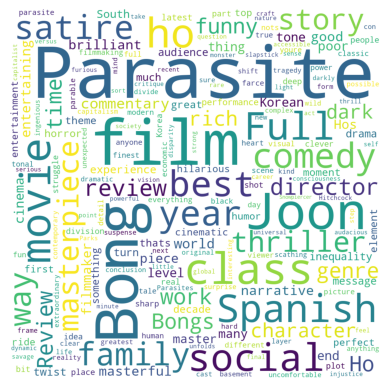

In [27]:
wc = WordCloud(width=1000, height=1000, background_color="white", random_state=32)
plt.imshow(wc.generate_from_frequencies(word_counts))
plt.axis("off")
plt.show()

막대차트로 단어카운트 살펴보기

In [28]:
word_count_df=pd.DataFrame(word_counts.most_common(30))
word_count_df.columns=['words','counts']

In [29]:
word_count_df

words  counts
0      Parasite     170
1          film     127
2          Bong     113
3          Joon      80
4         class      57
5         movie      53
6            ho      50
7       Spanish      45
8        social      44
9          Full      44
10         best      38
11         year      37
12       comedy      36
13       satire      33
14       family      29
15          way      27
16        story      25
17  masterpiece      25
18     thriller      24
19     director      23
20       review      23
21         work      21
22       Review      21
23         time      20
24           Ho      19
25        Bongs      19
26        genre      19
27        funny      19
28         rich      18
29    character      18

<AxesSubplot: xlabel='counts', ylabel='words'>

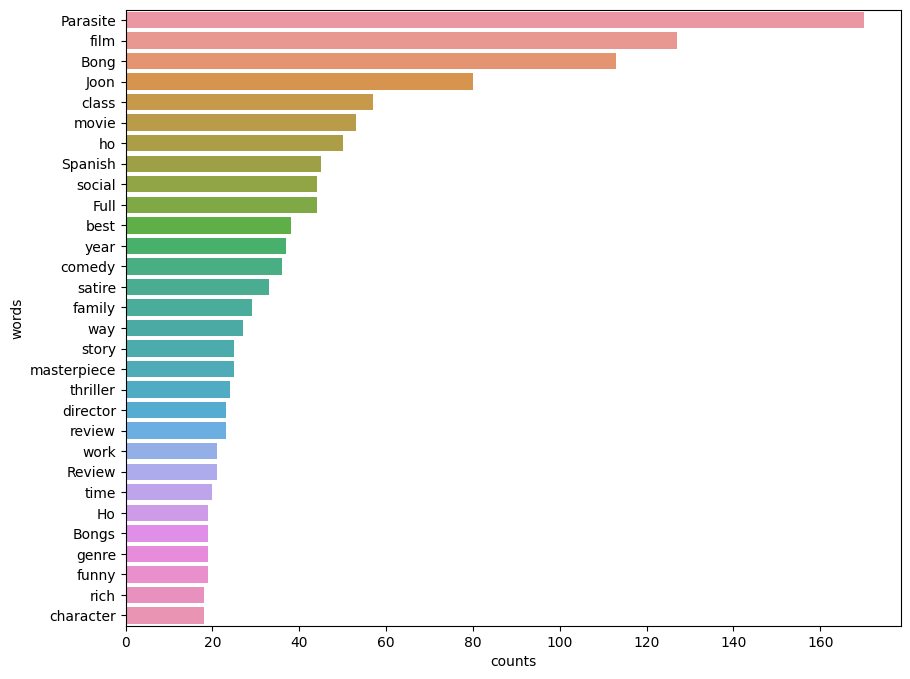

In [30]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='words', data=word_count_df)

### TF-IDF

In [32]:
total_words_lists_tfidf=[]

for words in df["preprocessed_reviews"]:
        total_words_lists_tfidf.append(' '.join(words))
    

total_words_lists_tfidf

['Parasite master class finest example mass deep meaningful story',
 'Ill Parasite masterpiece',
 'film feel hypocritical theme social injustice',
 'Boon Joon Ho story shift tone satire screwball farce black comedy horror sympathy family',
 'splendid take class inequality audience question parasite rich poor',
 'content basic premise crime punishment director Bong Joon Ho step tangent running time',
 'ironic tone event berserk Parasite entertaining foremost',
 'actor different nuance respective portrayal sync picture tone',
 'Bongs work galvanizing movie people wealth gap precariousness urban underclass era climate change',
 'best film decade Korean nation way interesting filmographies contemporary time greatest strength story small powerful Full review Spanish',
 'Bongs film layer impossible black comedy thriller horror family drama allegory class',
 'unusual director antenna social classBong past decade significant filmmaker',
 'Parasite single film',
 'impressive part crowd pleaser 

In [34]:
! pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 10.4 MB/s eta 0:00:00
  Using cached scipy-1.10.0-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizer = CountVectorizer() 
movie_bow = word_vectorizer.fit_transform(total_words_lists_tfidf) 

In [36]:
print(len(word_vectorizer.vocabulary_))
word_vectorizer.vocabulary_

1524


{'parasite': 949,
 'master': 815,
 'class': 196,
 'finest': 502,
 'example': 445,
 'mass': 814,
 'deep': 314,
 'meaningful': 827,
 'story': 1260,
 'ill': 650,
 'masterpiece': 818,
 'film': 495,
 'feel': 484,
 'hypocritical': 644,
 'theme': 1343,
 'social': 1212,
 'injustice': 685,
 'boon': 123,
 'joon': 723,
 'ho': 618,
 'shift': 1166,
 'tone': 1367,
 'satire': 1123,
 'screwball': 1140,
 'farce': 475,
 'black': 108,
 'comedy': 223,
 'horror': 626,
 'sympathy': 1310,
 'family': 471,
 'splendid': 1243,
 'take': 1318,
 'inequality': 677,
 'audience': 75,
 'question': 1041,
 'rich': 1094,
 'poor': 1000,
 'content': 257,
 'basic': 86,
 'premise': 1012,
 'crime': 282,
 'punishment': 1035,
 'director': 349,
 'bong': 120,
 'step': 1256,
 'tangent': 1321,
 'running': 1116,
 'time': 1357,
 'ironic': 708,
 'event': 439,
 'berserk': 100,
 'entertaining': 426,
 'foremost': 519,
 'actor': 17,
 'different': 344,
 'nuance': 913,
 'respective': 1083,
 'portrayal': 1002,
 'sync': 1311,
 'picture': 975,


In [41]:
! pip install --upgrade scikit-learn

In [43]:
#print(word_vectorizer.get_feature_names()()[:30])
print(word_vectorizer.get_feature_names_out()[:30])
movie_bow.toarray().shape

['ability' 'able' 'absolute' 'absurd' 'absurdist' 'accessible' 'acclaim'
 'accomplished' 'accomplishment' 'accounting' 'acerbic' 'achievement'
 'acidic' 'acrobat' 'act' 'acting' 'action' 'actor' 'addition'
 'admonishment' 'advance' 'adventure' 'adversarial' 'advise' 'age' 'agile'
 'aint' 'air' 'akin' 'alfred']


(458, 1524)

In [44]:
import numpy as np

In [45]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.6f}".format(x)})


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(total_words_lists_tfidf)
result=tfidfv.transform(total_words_lists_tfidf).toarray()
result_vocab=tfidfv.vocabulary_
#print(result_vocab)
print(result)

result.shape

[[0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 ...
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]
 [0.000000 0.000000 0.000000 ... 0.000000 0.000000 0.000000]]


(458, 1524)

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer 

# count matrix 
count_vector=word_vectorizer.transform(total_words_lists_tfidf) 

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=False) 
tfidf_transformer.fit(movie_bow)

tf_idf_vector=tfidf_transformer.transform(count_vector)


In [48]:
is_empty = result.size == 0
print(is_empty)

False


In [50]:
feature_names = word_vectorizer.get_feature_names_out()

first_document_vector=tf_idf_vector[456]

dff = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
dff.sort_values(by=["tfidf"],ascending=False)

tfidf
nation     0.333333
statement  0.333333
memories   0.333333
bongs      0.333333
gripping   0.333333
...             ...
fitting    0.000000
first      0.000000
finish     0.000000
finger     0.000000
zeitgeist  0.000000

[1524 rows x 1 columns]

In [51]:
word_count_df=pd.DataFrame(word_counts.most_common(30))
word_count_df.columns=['words','counts']

<AxesSubplot: xlabel='counts', ylabel='words'>

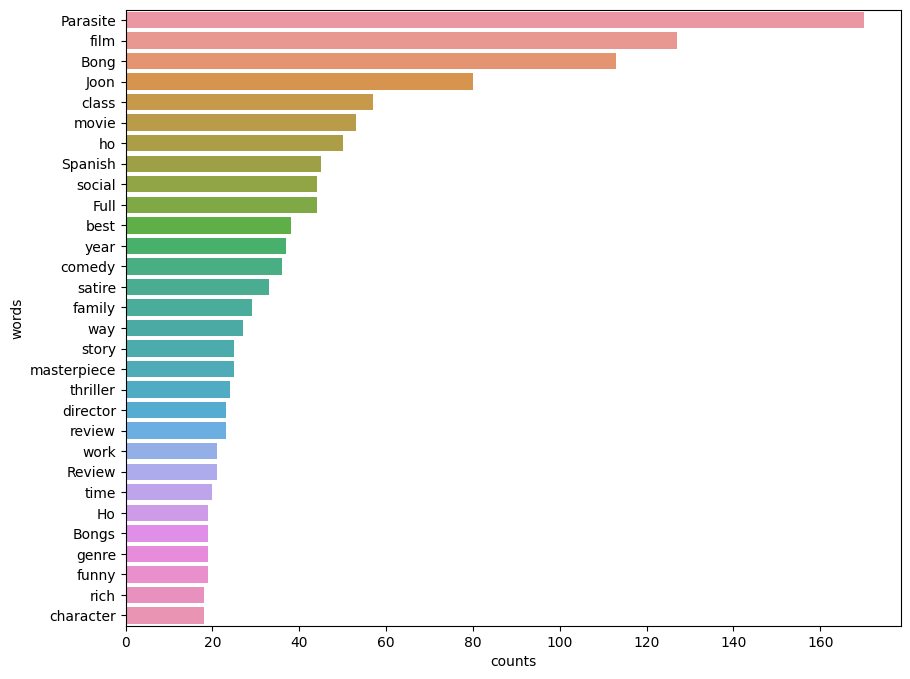

In [52]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='words', data=word_count_df)

In [53]:
result_vocab_sorted=sorted(result_vocab.items())
#print(result_vocab_sorted)

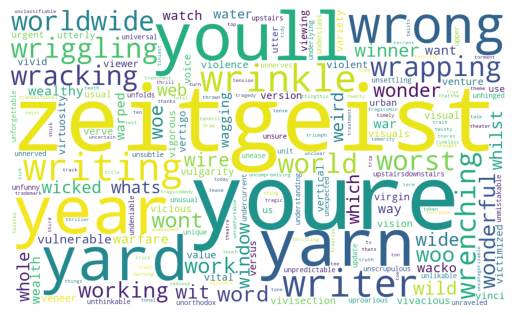

In [54]:
wc2 = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc2.generate_from_frequencies(word_vectorizer.vocabulary_))
plt.axis("off")
plt.show()

### FreqDist

FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. Text 클래스의 vocab 메서드로 추출할 수 있다.

In [55]:
from nltk import FreqDist

In [56]:
fd = .vocab()
type(fd)

SyntaxError: invalid syntax (1895765744.py, line 1)